Fungus areas: [183, 438, 438, 1241, 1670, 1670, 2224, 3353, 3353, 9544, 10749, 11046, 11873, 16607, 17760, 28521]


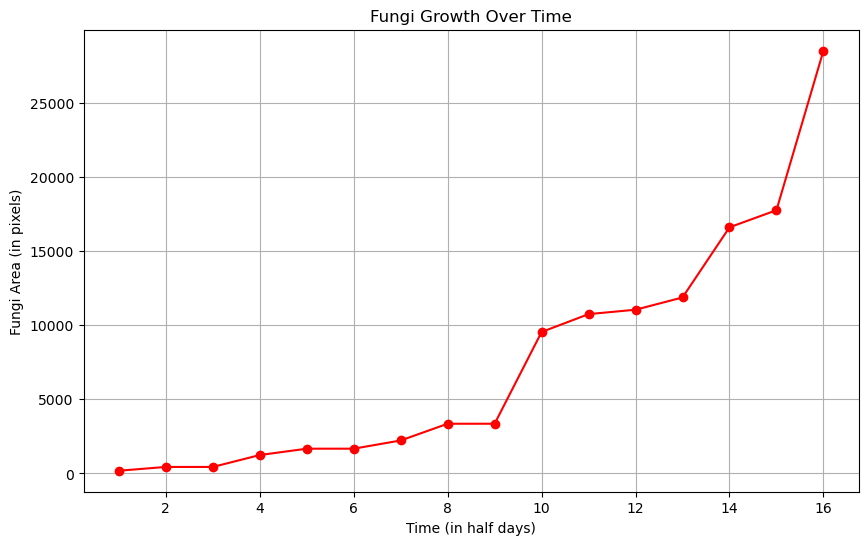

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(filename):
    # Read the image in grayscale
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Check if the image was successfully loaded
    if image is None:
        print(f"Error loading image {filename}")
        return None
    
     # Function definition
    def crop_circle(image, radius_factor=0.85):
        # Get the dimensions of the image
        height, width = image.shape[:2]
        # Create a black image with the same dimensions
        mask = np.zeros((height, width), dtype=np.uint8)
        # Define the center and radius of the circle
        center = (int(width / 2), int(height / 2))
        original_radius = min(center[0], center[1])
        radius = int(original_radius * radius_factor)
        # Draw the circle on the mask
        cv2.circle(mask, center, radius, (255,), -1, cv2.LINE_AA)
        # Apply the mask to the original image
        masked_image = cv2.bitwise_and(image, image, mask=mask)
        return masked_image
    
    # Crop the image
    cropped_image = crop_circle(image, radius_factor=0.8)
    
    # Specify the new dimensions
    resized_image = cv2.resize(cropped_image, (512, 512))

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(resized_image, (5, 5), 0)

    # Apply global thresholding
    ret, thresh1 = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY_INV)
    

    # Calculate the area of the dark regions (fungus)
    fungus_area = cv2.countNonZero(thresh1)
    
    

    return fungus_area

# List of image filenames
filenames = [f"{i}.jpg" for i in range(1, 17)]

# Initialize a list to store fungus areas
fungus_areas = []

# Process each image and calculate the area of fungus
for filename in filenames:
    area = process_image(filename)
    fungus_areas.append(area-132500) #darkened area from the mask is reduced by the area

# Print the calculated areas
print("Fungus areas:", fungus_areas)

# Plot the growth of fungus over time
days = list(range(1, 17))

plt.figure(figsize=(10, 6))
plt.plot(days, fungus_areas, marker='o', linestyle='-', color='r')
plt.title('Fungi Growth Over Time')
plt.xlabel('Time (in half days)')
plt.ylabel('Fungi Area (in pixels)')
plt.grid(True)
plt.show()